In [8]:
import os
import numpy as np
from PIL import Image, ImageDraw
np.set_printoptions(suppress=True)

In [4]:
consider_distort = True
zoomed_coords = True
num_shots = 1
SCALE_FAC = 4.0 # Scale factor of coordinates

In [5]:
img_folder = "data/stars/2016nov-11//" # images folder
res_folder = 'results/2016nov-11//' # results folder
coords_folder = 'data/star_coords/2016nov-11_txt/' # folder with coords files

In [10]:
# 2016nov-11 jpg
fnames = [
    "20161122-191517-359.txt",
    "20161122-201517-375.txt",
    "20161122-211517-375.txt",
    "20161122-221517-375.txt"
]

In [11]:
coords_list = []
for fname in fnames:
    piece = np.loadtxt(coords_folder + os.sep + fname)
    coords_list.append(piece)

coords = np.vstack(coords_list)
print 'Zoomed In Star coordinates pairs:\n', coords, '\n'

if zoomed_coords:
    coords /= float(SCALE_FAC)
    coords = coords.round()
    print 'Normal Star coordinates pairs:\n', coords

Zoomed In Star coordinates pairs:
[[  5734.   6266.   6711.   6411.]
 [  6490.   6723.   7468.   6866.]
 [  5934.   7360.   6910.   7507.]
 [  6209.   7975.   7190.   8129.]
 [  9774.   8478.  10880.   8711.]
 [ 10446.   6163.  11559.   6314.]
 [ 10446.   3421.  11514.   3477.]
 [  8961.   1184.   9917.   1233.]
 [  2774.    834.   3744.   1098.]
 [  2590.   4247.   3603.   4430.]
 [  3413.   3882.   4398.   4059.]
 [  4925.   5164.   5897.   5313.]
 [  5752.   5441.   6722.   5588.]
 [  5350.   6173.   6327.   6316.]
 [  5744.   6692.   6720.   6837.]
 [   559.    205.   1675.    599.]
 [  1301.   3859.   2372.   4068.]
 [  2059.   3306.   3090.   3523.]
 [  9154.   6391.  10192.   6543.]
 [  9394.   4114.  10417.   4210.]
 [  8940.   1459.   9900.   1517.]
 [  7235.   7108.   8228.   7262.]
 [  8046.   7445.   9058.   7613.]
 [  9455.   6441.  10512.   6595.]
 [  8230.   4581.   9217.   4702.]
 [  8051.   2332.   9002.   2428.]
 [  3890.   4262.   4866.   4428.]
 [  4766.   4356.   5

In [12]:
lX = coords[:, 0] # leftX coordinates
lY = coords[:, 1] # leftY coordinates
rX = coords[:, 2] # rightX coordinates
rY = coords[:, 3] # rightY coordinates

N = coords.shape[0] # number of pairs of points
M = coords.shape[1] # lX, lY, rX, rY == 4
print 'Number of Star coordinates pairs:', N

Number of Star coordinates pairs: 39


In [13]:
# for ipynb
fname_left = img_folder + os.sep + "mod_" + fnames[0][:-4] + '-1.jpg'
fname_right = img_folder + os.sep + "mod_" + fnames[0][:-4] + '-2.jpg'

In [14]:
img_left = Image.open(fname_left).convert(mode='RGB')
img_right = Image.open(fname_right).convert(mode='RGB')
print """Images loaded as RGB:
%s
%s""" % (fname_left, fname_right)

Images loaded as RGB:
data/stars/2016nov-11///mod_20161122-191517-359-1.jpg
data/stars/2016nov-11///mod_20161122-191517-359-2.jpg


In [15]:
assert (img_left.size == img_right.size)
w, h = width, height = img_left.size
print 'Original width, height:', w, h

Original width, height: 3072 2304


In [16]:
x_c = img_left.width / 2.0
y_c = img_left.height / 2.0
print 'x_c, y_c:', x_c, y_c

x_c, y_c: 1536.0 1152.0


In [40]:
sl_img = Image.new('RGB', (width, height), 'lightgray') # Scatter Left. Img
sr_img = Image.new('RGB', (width, height), 'lightgray') # Scatter Right Img

sl_pix = sl_img.load()
sr_pix = sr_img.load()

In [41]:
ELL_RAD = 3

scx_c = sl_img.width / 2
scy_c = sl_img.height / 2

In [45]:
# Draw Left Stars
draw = ImageDraw.Draw(sl_img)
draw.ellipse((scx_c-ELL_RAD, scy_c-ELL_RAD, scx_c+ELL_RAD, scy_c+ELL_RAD), fill='darkgreen')

In [46]:
for i in xrange(N): # draw star points
    draw.ellipse((lX[i]-ELL_RAD, lY[i]-ELL_RAD, lX[i]+ELL_RAD, lY[i]+ELL_RAD), fill='red')

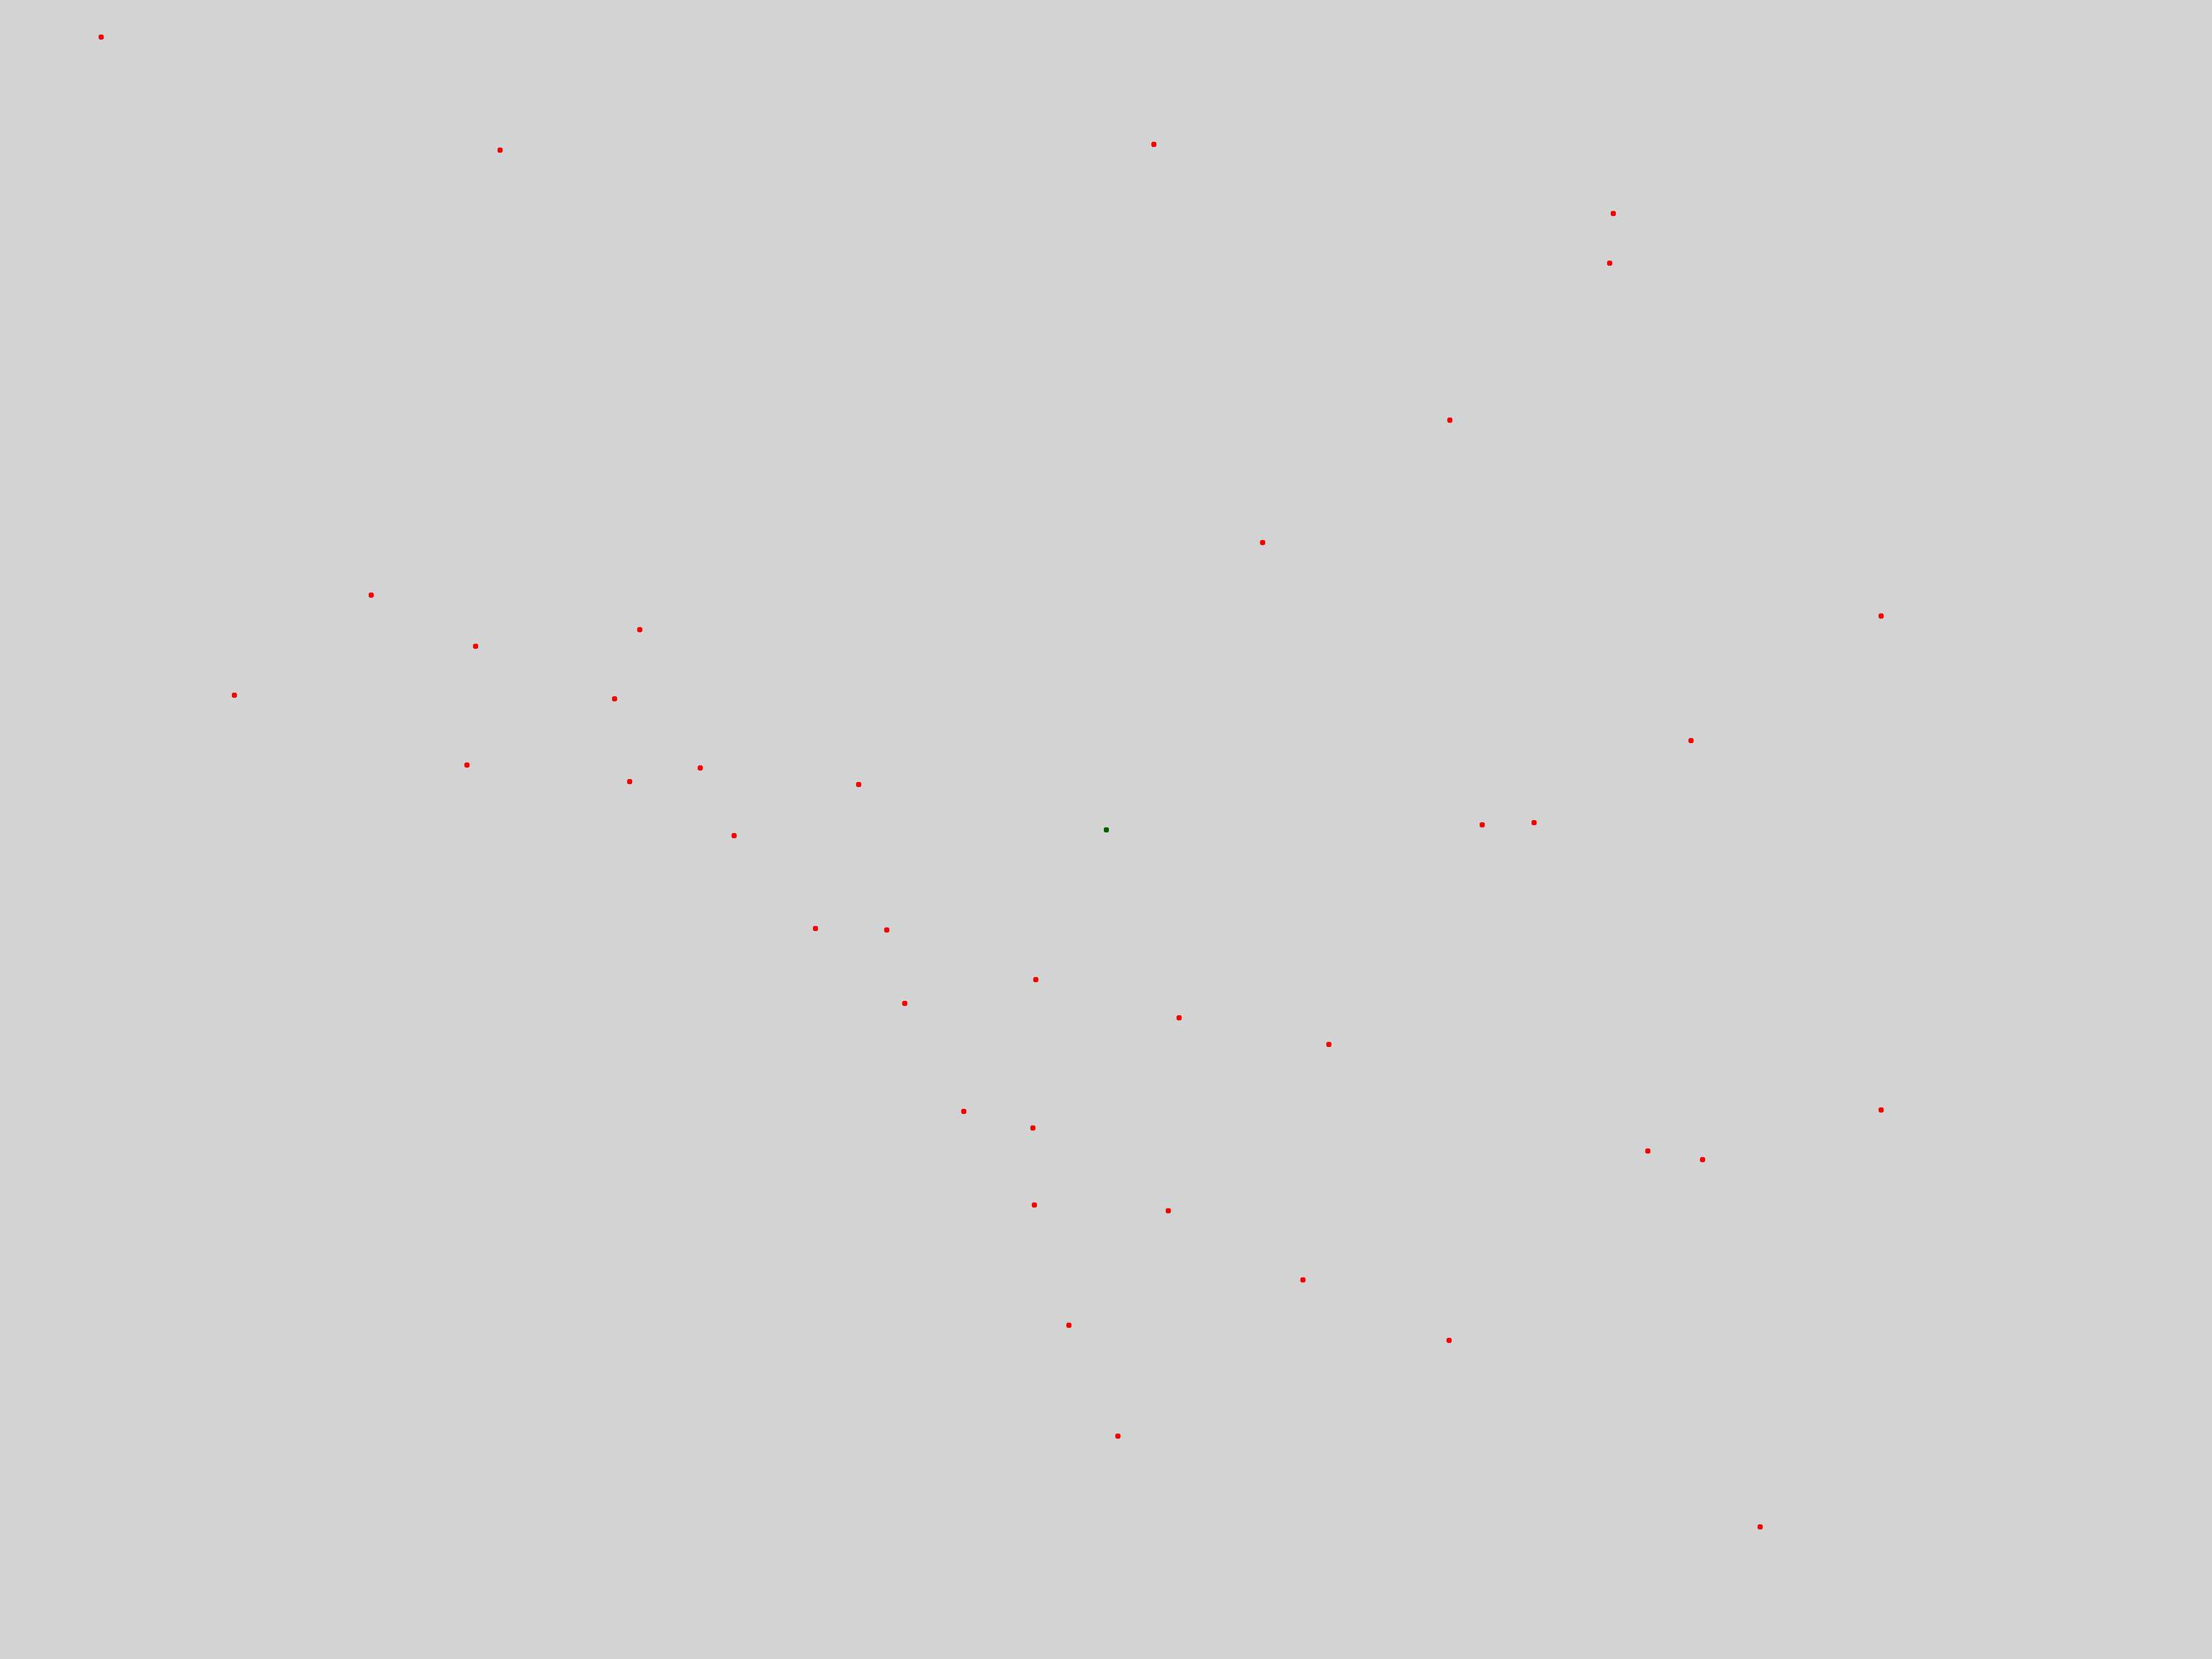

In [47]:
sl_img

In [51]:
# Draw Right Stars
draw = ImageDraw.Draw(sr_img)
draw.ellipse((scx_c-ELL_RAD, scy_c-ELL_RAD, scx_c+ELL_RAD, scy_c+ELL_RAD), fill='darkgreen')

In [52]:
for i in xrange(N): # draw star points
    draw.ellipse((rX[i]-ELL_RAD, rY[i]-ELL_RAD, rX[i]+ELL_RAD, rY[i]+ELL_RAD), fill='blue')

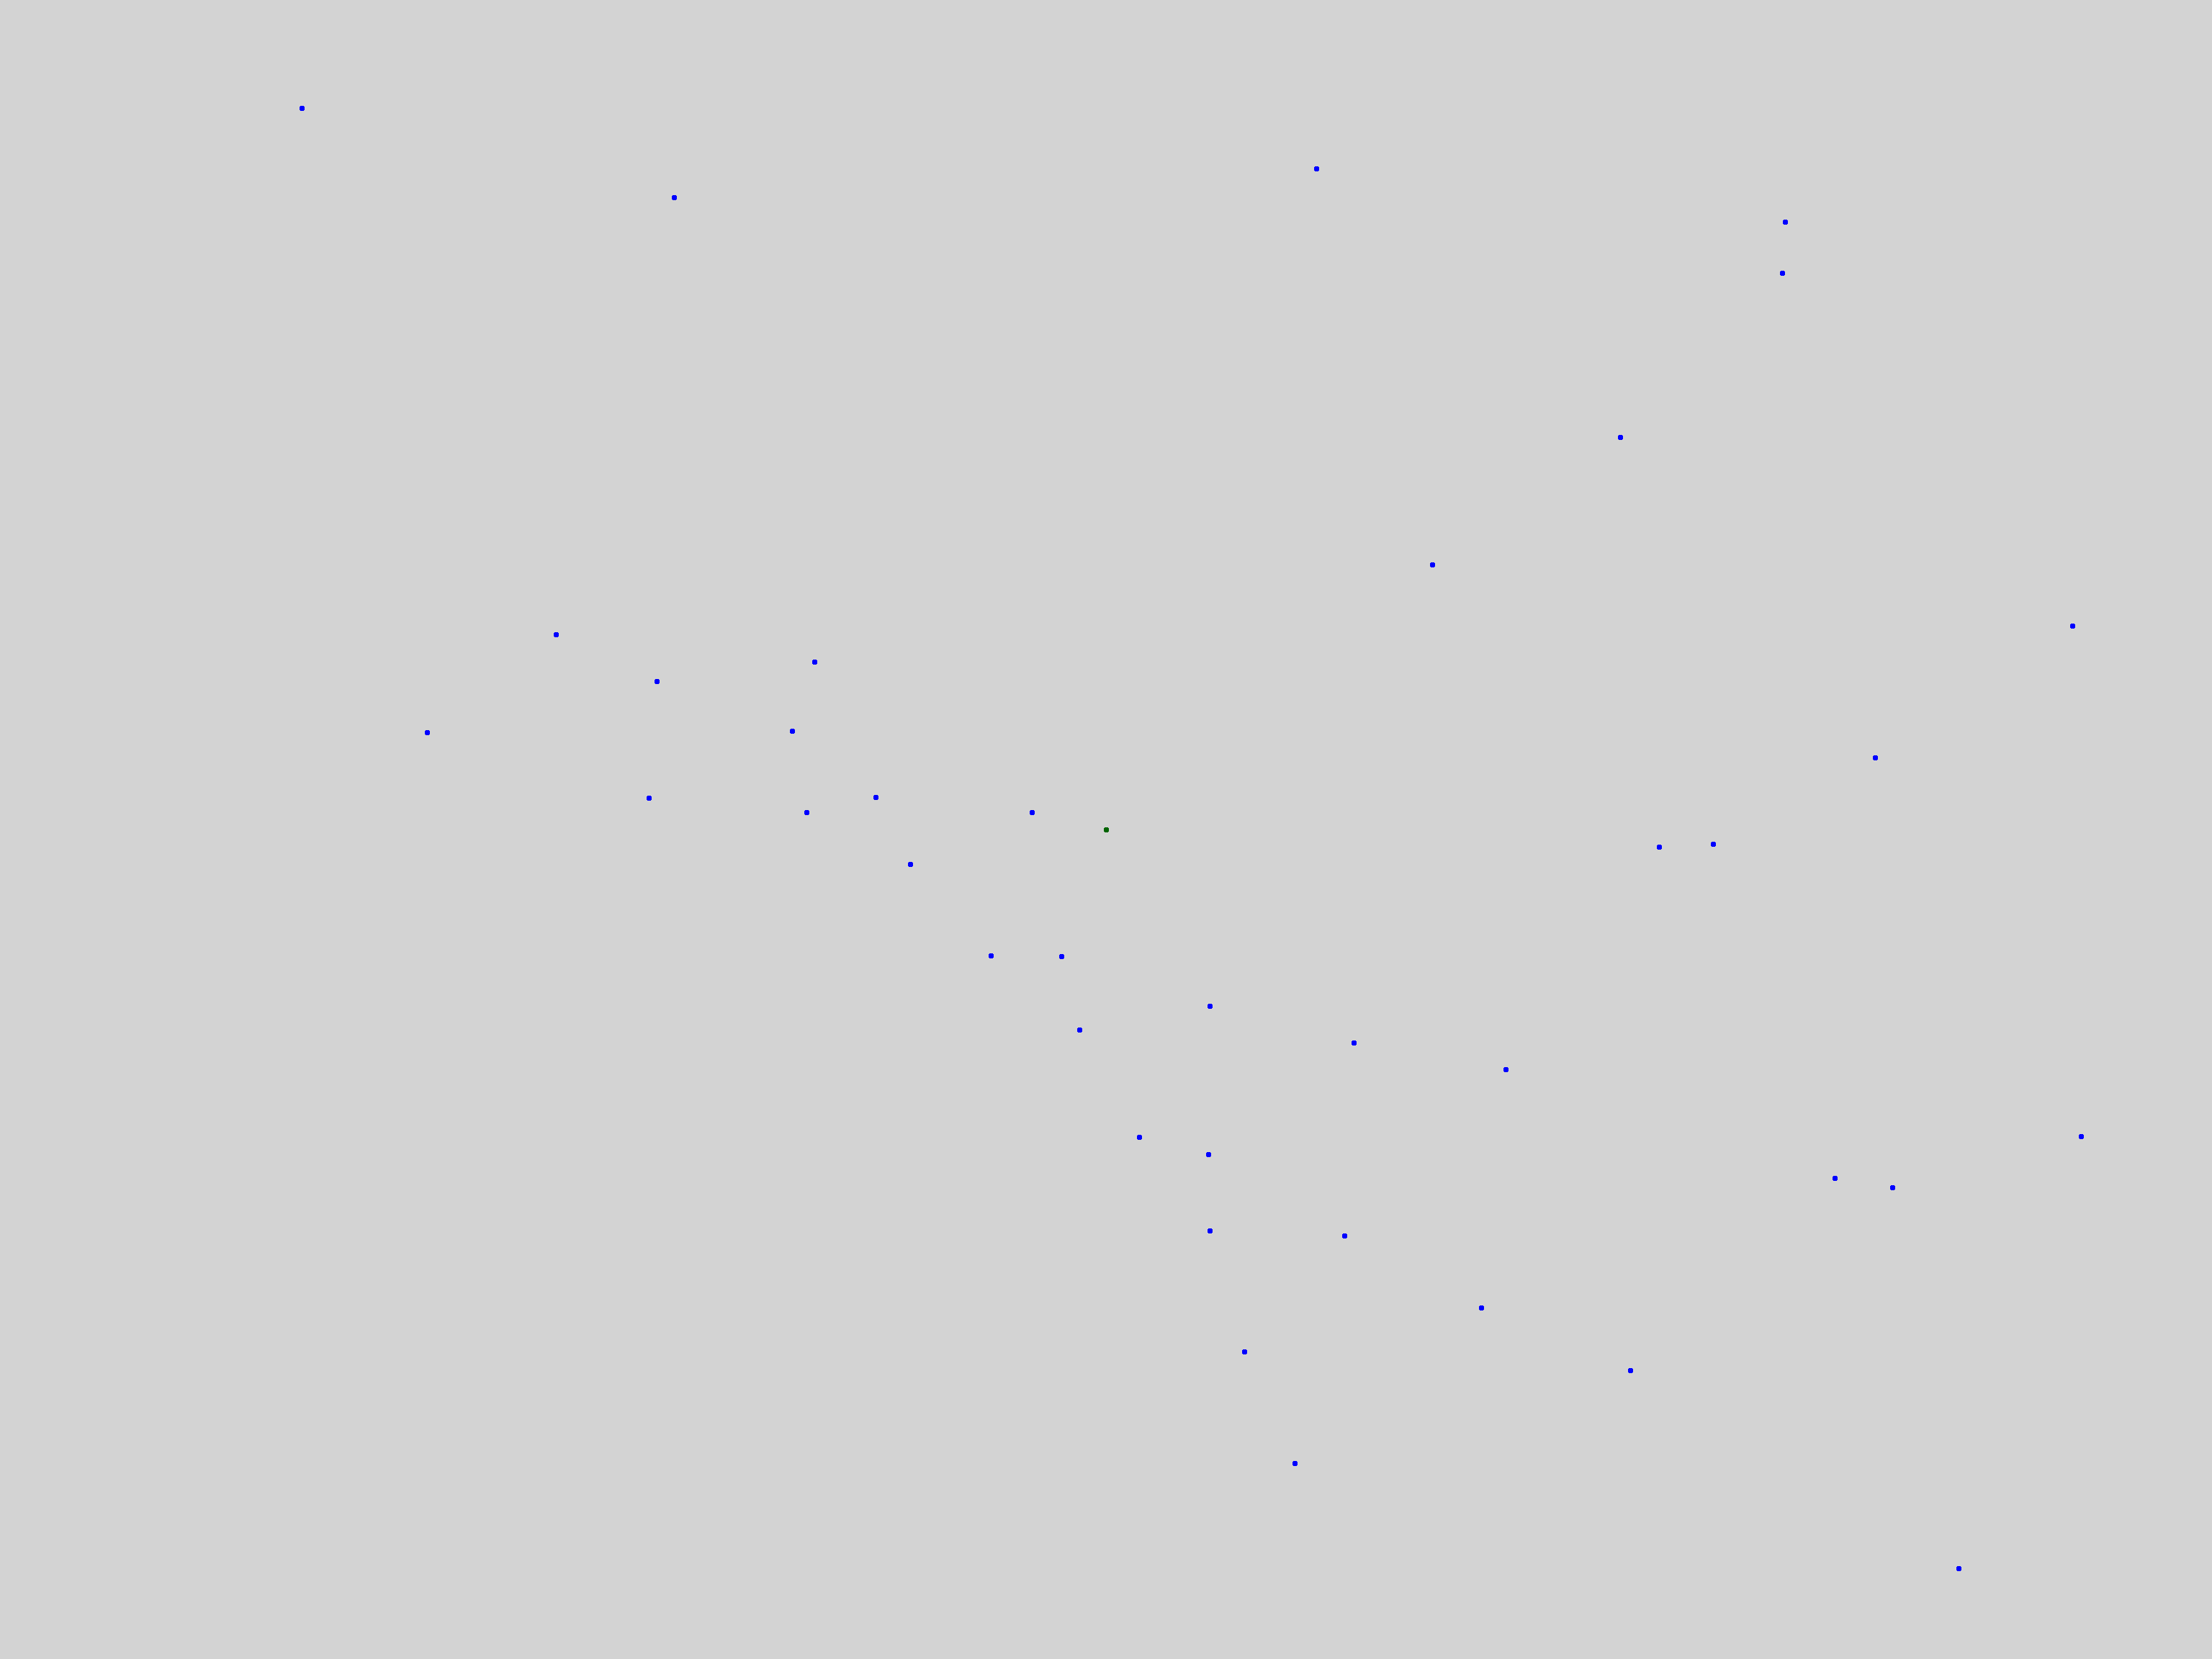

In [53]:
sr_img

In [55]:
sl_img.save(res_folder + 'scat_left_N' + str(N) + ".jpg")
sr_img.save(res_folder + 'scat_right_N' + str(N) + ".jpg")